In [1]:
#|default_exp app

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

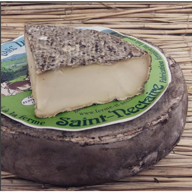

In [3]:
im = PILImage.create('cheese saint-nectaire.jpg')
im.thumbnail((192,192))
im

In [4]:
#|export
learn = load_learner('model.pkl')

In [5]:
learn.predict(im)

('saint-nectaire',
 TensorBase(8),
 TensorBase([6.8587e-04, 1.6405e-02, 9.1968e-03, 4.0232e-03, 3.7507e-03,
             1.7188e-05, 1.4616e-03, 1.5487e-03, 9.6252e-01, 3.9549e-04]))

In [9]:
#|export
categories = learn.dls.vocab

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [10]:
classify_image(im)

{'brie': 0.0006858668057247996,
 'brocciu': 0.01640496402978897,
 'camembert': 0.00919677596539259,
 'comté': 0.004023181740194559,
 "mont d'or": 0.0037506883963942528,
 'raclette': 1.718786734272726e-05,
 'reblochon': 0.001461558393202722,
 'roquefort': 0.0015487062046304345,
 'saint-nectaire': 0.9625155329704285,
 'époisse': 0.00039548747008666396}

In [16]:
#|export
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['cheese époisse.jpg', 'cheese camembert.jpg', 'cheese saint-nectaire.jpg', 'cheese raclette.jpg', 
            'cheese roquefort.jpg', 'cheese brocciu.jpg', 'cheese comté.jpg', "cheese mont d'or.jpg", 'cheese reblochon.webp', 'cheese brie.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

/home/explore/miniconda3/envs/fastai/lib/python3.8/site-packages/gradio/inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/explore/miniconda3/envs/fastai/lib/python3.8/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/home/explore/miniconda3/envs/fastai/lib/python3.8/site-packages/gradio/outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/home/explore/miniconda3/envs/fastai/lib/python3.8/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x7f37f1ee8d00>, 'http://127.0.0.1:7862/', None)

## export

In [17]:
import nbdev; nbdev.export.nb_export('app.ipynb', lib_path='.')